## Maching Learning - Clustering demo with PyClustering and sklearn

In this demo I am using the Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
from scipy import stats

### Required Installations: 

### I am using kmodes for question 1

### I am using PyClustering library APIs to build the clusters for this assignment (for Question Numbers 4, 5, and 6 . 

### Please execute the following code to install it locally before executing this notebook.

### All the required imports are defined before the code reference to this library

In [9]:
!pip install pyclustering

You should consider upgrading via the '/home/pamela/anaconda3/bin/python -m pip install --upgrade pip' command.


In [10]:
!pip install kmodes

You should consider upgrading via the '/home/pamela/anaconda3/bin/python -m pip install --upgrade pip' command.


## Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., exclude attributes 1,

In [3]:
scadi_ds_url = 'https://raw.githubusercontent.com/pam1202g/SIT720_A2/main/SCADI.csv'

In [4]:
self_care_df = pd.read_csv(scadi_ds_url)

In [5]:
sc_reduced_df = self_care_df.iloc[:, 2:205]

In [6]:
sc_reduced_df = sc_reduced_df.loc[:, (sc_reduced_df != 0).any()]

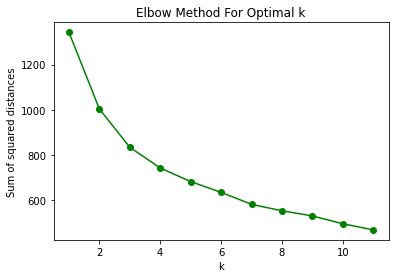

In [7]:
ssq = []
no_cl_min = 1
no_cl_max = 12
K = range(no_cl_min,no_cl_max)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sc_reduced_df)
    ssq.append(km.inertia_)
    
plt.plot(K, ssq, 'go-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1862.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 1427.0
Run 1, iteration: 2/100, moves: 0, cost: 1427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 19, cost: 1440.0
Run 2, iteration: 2/100, moves: 6

Starting iterations...
Run 2, iteration: 1/100, moves: 7, cost: 989.0
Run 2, iteration: 2/100, moves: 1, cost: 989.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7, cost: 825.0
Run 3, iteration: 2/100, moves: 0, cost: 825.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15, cost: 741.0
Run 4, iteration: 2/100, moves: 3, cost: 741.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11, cost: 859.0
Run 5, iteration: 2/100, moves: 4, cost: 847.0
Run 5, iteration: 3/100, moves: 0, cost: 847.0
Best run was number 4


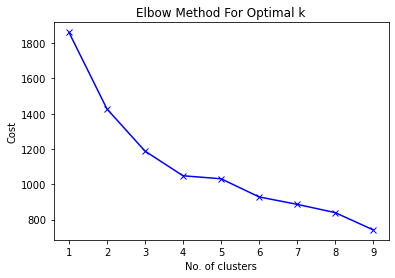

In [12]:
K = range(1,10)
cost = []
for k in K:
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    kmode.fit(sc_reduced_df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## Dimensionality Reduction

In [102]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [103]:
x_norm = scale(sc_reduced_df)
pca_comp = np.min(sc_reduced_df.shape)

In [104]:
pca = PCA(n_components=pca_comp)
pca.fit(x_norm)
print(pca)

PCA(n_components=70)


In [105]:
var_rto = pca.explained_variance_ratio_

### Plotting the variance ratio

Text(0, 0.5, 'Variance')

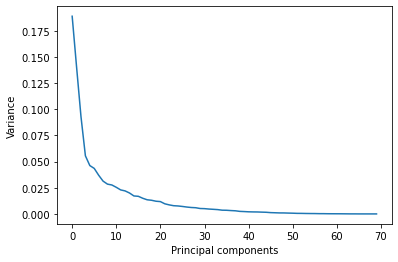

In [106]:
plt.plot(var_rto)
plt.xlabel("Principal components")
plt.ylabel("Variance")

In [107]:
var_capt = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)

In [ ]:
selected_components = 50

Text(0, 0.5, 'Variance captured')

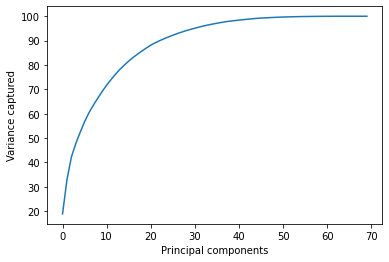

In [108]:
plt.plot(var_capt)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [109]:
print("Captured variance")
print(var_capt)

Captured variance
[18.88 32.91 42.2  47.75 52.37 56.72 60.42 63.55 66.4  69.16 71.7  73.99
 76.19 78.19 79.91 81.59 83.08 84.43 85.73 86.94 88.12 89.09 89.95 90.73
 91.49 92.2  92.86 93.47 94.06 94.58 95.08 95.55 95.99 96.4  96.76 97.11
 97.43 97.73 97.97 98.19 98.39 98.58 98.77 98.94 99.1  99.22 99.33 99.42
 99.51 99.59 99.66 99.71 99.76 99.8  99.84 99.87 99.89 99.91 99.93 99.95
 99.96 99.97 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98]


In [111]:
pca = PCA(n_components=50)
z_reduced = pca.fit_transform(x_norm)

x_reconstruction = pca.inverse_transform(z_reduced)
reconstruction_error = np.linalg.norm(x_norm-x_reconstruction, 'fro')/np.linalg.norm(x_norm, 'fro')
print(reconstruction_error)

0.06378302423544131


## Common Data Loading and Data Processing functions

In [13]:
def load_data(url):
    df = pd.read_csv(url)
    return df

In [14]:
def replace_values(df):
    replace_values_spread = {"Gender": {"Female": 2, "Male": 1},
                "family_history_with_overweight": {"yes": 1, "no": 0},
                "FAVC": {"yes": 1, "no": 0},
                "FCVC": {3: 0, 2: 1, 1: 2, 0: 3},  
                "CAEC": {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3},
                "NCP": {4: 4, 3: 3, 2: 2, 1: 1},
                "CH20": {3: 0, 2: 1, 1: 2},  
                "SMOKE": {"yes": 1, "no": 0},
                "SCC": {"yes": 0, "no": 1},
                "FAF": {3: 0, 2: 1, 1: 2, 0: 3}, 
                "TUE": {2: 2, 1: 1, 0: 0}, 
                "CALC": {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3},
                "MTRANS": {"Automobile": 4, "Public_Transportation": 2, "Walking": 0, "Motorbike": 3, "Bike": 1}}

    df = df.replace(replace_values_spread)
    return df

In [15]:
def add_type(df):
    df['Age'] = df['Age'].astype(int)
    df['Height'] = np.round(df['Height'], 2)
    df['Weight'] = np.round(df['Weight'], 2)
    df['FCVC'] = np.ceil(df['FCVC'])
    df['NCP'] = np.ceil(df['NCP'])
    df['CH2O'] = np.ceil(df['CH2O'])
    df['FAF'] = np.ceil(df['FAF'])
    df['TUE'] = np.ceil(df['TUE'])
    
    return df

## Listing all the prediction methods

In [16]:
def predict_euclidean_square(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2.0
    
    return distance

In [17]:
def predict_manhattan(point1, point2):
    distance = 0.0
    dimension = len(point1)
 
    for i in range(dimension):
        distance += abs(point1[i] - point2[i])

    return distance

## Building a machine learning (ML) model for predicting “weight” using all features except “NObeyesdad” and report observed performance. Explain your results based on following criteria:

#### Seed and test dataset size configuration

In [18]:
r_state = 15
test_ds_sz = 0.003

In [19]:
df_rg = load_data("https://raw.githubusercontent.com/pam1202g/SIT720_A2/main/obesity_levels.csv")


df_rg.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [20]:
df_rg = add_type(df_rg)

In [21]:
df_rg = replace_values(df_rg)

#### Stratified Split requires np array, converting dataframe to np arrays

In [22]:
weight_col_idx = 4
target_df_rg = df_rg.iloc[:,weight_col_idx]

feat_list = df_rg.to_numpy()
targ_list = target_df_rg.to_numpy()

#### Performing StratifiedSplit  that returns stratified randomized folds. This mechpreserving the percentage of samples for each class.

In [23]:
feat_train = []
feat_test = []

sss_rg = StratifiedShuffleSplit(n_splits=1, test_size=test_ds_sz, random_state=r_state)
sss_rg.get_n_splits(feat_list, targ_list)

for tr_idx, test_idx in sss_rg.split(feat_list, targ_list):
    feat_train, feat_test = feat_list[tr_idx], feat_list[test_idx]

#### Coverting the training data np array back to a dataframe

In [24]:
train_df_rg = pd.DataFrame(feat_train, columns=["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"])

#### Removing all the Target and Type variables from the Dataset before unsupervised learning

In [25]:
obs_df_train = train_df_rg[["Gender", "Age", "Height", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]].copy()

####  I am using the reduced dataframe here. Weight and ObesityType field is no longer a part the input dataset used for clustering.

In [26]:
no_of_fields = 15

#### Elbow Plot - From the Elbow plot I am trying to get the optimum number of Clusters

In [27]:
ssq_dist = []
K = range(1,no_of_fields)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(obs_df_train)
    ssq_dist.append(km.inertia_)

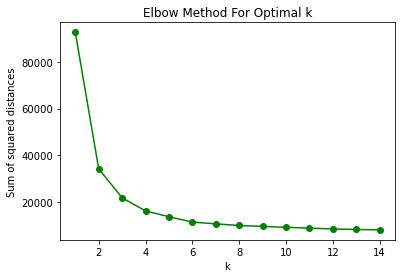

In [28]:
plt.plot(K, ssq_dist, 'go-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### From the Elbow plot I have decided to make 3 clusters for the dataset

In [29]:
no_of_clusters = 3

#### Converting the DataFrame to the numpy array before Clustering.

In [30]:
X = obs_df_train.iloc[:,0:no_of_fields].values

#### I am using PyClustering library to build the cluster. As I am using different Distance Metric here so I am using the python version of PyClustering

In [33]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.silhouette import silhouette

In [34]:
initial_medoids = kmeans_plusplus_initializer(X, no_of_clusters, random_state=r_state).initialize(return_index=True)
metric = distance_metric(type_metric.MANHATTAN, degree=2)
kmedoids_instance = kmedoids(X, initial_medoids, metric=metric)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

#### Reporting the Cluster Score using the Silhouette score

The silhouette method of PyClustering assign a score to each point of the cluster. I am gathering the datapoints and then calculating the aggregate of the silhouette score per cluster.

The acceptable silhouette score is between -1 and 1

In [35]:
score = silhouette(X, clusters).process().get_score()
print(len(score))

2104


In [36]:
cluster_0_lst = kmedoids_instance.get_clusters()[0]
cluster_1_lst = kmedoids_instance.get_clusters()[1]
cluster_2_lst = kmedoids_instance.get_clusters()[2]

In [37]:
cluster_0_scores = []
cluster_1_scores = []
cluster_2_scores = []

for idx in cluster_0_lst:
    cluster_0_scores.append(score[idx])
    
for idx in cluster_1_lst:
    cluster_1_scores.append(score[idx])

for idx in cluster_2_lst:
    cluster_2_scores.append(score[idx])

print(np.mean(cluster_0_scores))
print(np.mean(cluster_1_scores))
print(np.mean(cluster_2_scores))

##  Cluster Analysis: Calculating the Average Weight of the members per cluster

## I am creating a separate copy of the original training dataset for my analysis

In [38]:
obs_df_cl = obs_df_train.copy()

### Adding a new column called cluster in the analysis ds to view the cluster membership of different points. This is defaulted to -1. After this I am updating this column with the cluster membership lists derived from the cluster such that all the datapoints whose idexes are under a specific cluster will be assigned to that cluster number.


In [39]:
obs_df_cl.insert(2, "Cluster", -1)

obs_df_cl.loc[cluster_0_lst, ['Cluster']] = 0
obs_df_cl.loc[cluster_1_lst, ['Cluster']] = 1
obs_df_cl.loc[cluster_2_lst, ['Cluster']] = 2

### Now from the original dataset I am merging back the Weight and NObeyesdad fields. Now we can see the Weigt values for the datapoints in a particular cluster.

In [40]:
clustered_obs_df = pd.merge(obs_df_cl, train_df_rg[["Weight", "NObeyesdad"]], left_index=True, right_index=True)

### Now I am extracting 3 different dataframes for each cluster with the aim of performing aggredates on the target column to understand average weight value for the cluster. This average weight values will be the reference points for predicting the Test Data.

### For any new datapoint in the test dataset, all I am doing is to calculate the distance from the centers and assign the new DP the closest cluster membership and based on that predicting their target variable values

In [41]:
obs_cl0_df = clustered_obs_df[clustered_obs_df['Cluster'] == 0]
obs_cl1_df = clustered_obs_df[clustered_obs_df['Cluster'] == 1]
obs_cl2_df = clustered_obs_df[clustered_obs_df['Cluster'] == 2]

In [42]:
print(obs_cl0_df["Weight"].median())
print(obs_cl0_df["Weight"].mean())
print(obs_cl0_df["Weight"].mode())

print(obs_cl0_df["Weight"].min())
print(obs_cl0_df["Weight"].max())

100.52000000000001
95.19649164677794
0    70
dtype: object
42.85
165.06


In [43]:
print(obs_cl1_df["Weight"].median())
print(obs_cl1_df["Weight"].mean())
print(obs_cl1_df["Weight"].mode())

print(obs_cl1_df["Weight"].min())
print(obs_cl1_df["Weight"].max())

84.16
89.58127717391305
0    80
dtype: object
45.0
130.0


In [44]:
print(obs_cl2_df["Weight"].median())
print(obs_cl2_df["Weight"].mean())
print(obs_cl2_df["Weight"].mode())

print(obs_cl2_df["Weight"].min())
print(obs_cl2_df["Weight"].max())

68.99000000000001
77.35043429844097
0    50
dtype: object
39.0
173.0


### According to the above analysis I can see that the median weight value is close to 100 for cluster 1, 68 for cluster 2 and 84 for cluster 3. I am taking into account the mode values because there are outliers existing in the datasets.

### Testing with a new DataPoints

In [45]:
test_df_rg = pd.DataFrame(feat_test, columns=["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"])

In [46]:
obs_df_test = test_df_rg[["Gender", "Age", "Height", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]].copy()

In [47]:
obs_df_test.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,18,1.78,1,1,1,4,1,0,3,1,1,2,0,4
1,1,30,1.91,1,1,0,3,1,0,2,1,2,1,1,2
2,2,19,1.59,1,1,1,1,0,0,2,1,1,0,0,2
3,2,39,1.57,1,1,0,2,1,0,2,1,1,0,1,4
4,1,37,1.75,1,1,0,3,1,0,2,1,2,1,1,4


In [48]:
len(obs_df_test)

7

In [49]:
Row_list = []
for index, rows in obs_df_test.iterrows(): 
    my_list =[rows.Gender, rows.Age, rows.Height, rows.family_history_with_overweight, rows.FAVC, rows.FCVC, rows.NCP, rows.CAEC, rows.SMOKE, rows.CH2O, rows.SCC, rows.FAF, rows.TUE, rows.CALC, rows.MTRANS]
    Row_list.append(my_list)
print(Row_list)

[[1, 18, 1.78, 1, 1, 1.0, 4.0, 1, 0, 3.0, 1, 1.0, 2.0, 0, 4], [1, 30, 1.91, 1, 1, 0.0, 3.0, 1, 0, 2.0, 1, 2.0, 1.0, 1, 2], [2, 19, 1.59, 1, 1, 1.0, 1.0, 0, 0, 2.0, 1, 1.0, 0.0, 0, 2], [2, 39, 1.57, 1, 1, 0.0, 2.0, 1, 0, 2.0, 1, 1.0, 0.0, 1, 4], [1, 37, 1.75, 1, 1, 0.0, 3.0, 1, 0, 2.0, 1, 2.0, 1.0, 1, 4], [2, 18, 1.7, 0, 1, 1.0, 4.0, 1, 0, 2.0, 1, 2.0, 1.0, 1, 2], [1, 23, 1.76, 1, 1, 1.0, 3.0, 1, 0, 3.0, 1, 0.0, 2.0, 0, 2]]


In [50]:
md_1 = obs_df_train.iloc[[medoids[0]],:]
md_2 = obs_df_train.iloc[[medoids[1]],:]
md_3 = obs_df_train.iloc[[medoids[2]],:]

In [51]:
d11m = predict_manhattan(Row_list[0], md_1.values[0])
d12m = predict_manhattan(Row_list[0], md_2.values[0])
d13m = predict_manhattan(Row_list[0], md_3.values[0])
dp_1_cl_proximity = [d11m, d12m, d13m]

d21m = predict_manhattan(Row_list[1], md_1.values[0])
d22m = predict_manhattan(Row_list[1], md_2.values[0])
d23m = predict_manhattan(Row_list[1], md_3.values[0])
dp_2_cl_proximity = [d21m, d22m, d23m]

d31m = predict_manhattan(Row_list[2], md_1.values[0])
d32m = predict_manhattan(Row_list[2], md_2.values[0])
d33m = predict_manhattan(Row_list[2], md_3.values[0])
dp_3_cl_proximity = [d31m, d32m, d33m]

d41m = predict_manhattan(Row_list[3], md_1.values[0])
d42m = predict_manhattan(Row_list[3], md_2.values[0])
d43m = predict_manhattan(Row_list[3], md_3.values[0])
dp_4_cl_proximity = [d41m, d42m, d43m]

d51m = predict_manhattan(Row_list[4], md_1.values[0])
d52m = predict_manhattan(Row_list[4], md_2.values[0])
d53m = predict_manhattan(Row_list[4], md_3.values[0])
dp_5_cl_proximity = [d51m, d52m, d53m]

print("Cluster proximity for data point 1: ", dp_1_cl_proximity)
print("Cluster proximity for data point 2: ", dp_2_cl_proximity)
print("Cluster proximity for data point 3: ", dp_3_cl_proximity)
print("Cluster proximity for data point 4: ", dp_4_cl_proximity)
print("Cluster proximity for data point 5: ", dp_5_cl_proximity)

Cluster proximity for data point 1:  [13.07, 24.1, 9.1]
Cluster proximity for data point 2:  [7.2, 8.23, 13.23]
Cluster proximity for data point 3:  [14.120000000000001, 23.09, 6.09]
Cluster proximity for data point 4:  [22.14, 7.109999999999999, 24.11]
Cluster proximity for data point 5:  [16.04, 5.07, 22.07]


In [52]:
dp_1_cluster = dp_1_cl_proximity.index(min(dp_1_cl_proximity))
dp_2_cluster = dp_2_cl_proximity.index(min(dp_2_cl_proximity))
dp_3_cluster = dp_3_cl_proximity.index(min(dp_3_cl_proximity))
dp_4_cluster = dp_4_cl_proximity.index(min(dp_4_cl_proximity))
dp_5_cluster = dp_5_cl_proximity.index(min(dp_5_cl_proximity))

print("Data point 1 cluster :", dp_1_cluster)
print("Data point 2 cluster :", dp_2_cluster)
print("Data point 3 cluster :", dp_3_cluster)
print("Data point 4 cluster :", dp_4_cluster)
print("Data point 5 cluster :", dp_5_cluster)

Data point 1 cluster : 2
Data point 2 cluster : 0
Data point 3 cluster : 2
Data point 4 cluster : 1
Data point 5 cluster : 1


#### Hence we can predict 

#### The weight value of the first data point is in the vicinity of the median weight score of cluster 2 is 68

#### The weight value of the second data point is  in the vicinity of the median weight score of cluster 0 is 100

#### The weight value of the third data point is in the vicinity of the median weight score of cluster 0 is 68

#### The weight value of the fourth data point is in the vicinity of the median weight score of cluster 1 is 84

#### The weight value of the fifth data point is in the vicinity of the median weight score of cluster 1 => 84

### Actual Weights of the Test Data points

In [53]:
cl_obs_test_df = pd.merge(obs_df_test, test_df_rg[["Weight", "NObeyesdad"]], left_index=True, right_index=True)
cl_obs_test_df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Weight,NObeyesdad
0,1,18,1.78,1,1,1,4,1,0,3,1,1,2,0,4,57.28,Insufficient_Weight
1,1,30,1.91,1,1,0,3,1,0,2,1,2,1,1,2,129.85,Obesity_Type_II
2,2,19,1.59,1,1,1,1,0,0,2,1,1,0,0,2,49,Normal_Weight
3,2,39,1.57,1,1,0,2,1,0,2,1,1,0,1,4,80,Obesity_Type_I
4,1,37,1.75,1,1,0,3,1,0,2,1,2,1,1,4,117.9,Obesity_Type_II


In [96]:
print("Closest Cluster to DataPoint1 :", dp_1_cluster)
print("Predicting weight for DataPoint1 ===============================")
print("Ground Truth ", cl_obs_test_df.iloc[0].Weight)
print("Median Weight calculated for closest cluster : ", obs_cl2_df["Weight"].median())
print("Predicted weight for DataPoint1 :", np.round(obs_cl2_df["Weight"].median(), 2))

print()

print("Closest Cluster to DataPoint2 :", dp_2_cluster)
print("Predicting weight for DataPoint2 ===============================")
print("Ground Truth ", cl_obs_test_df.iloc[1].Weight)
print("Median Weight calculated for closest cluster : ", obs_cl0_df["Weight"].median())
print("Predicted weight for DataPoint2 :", np.round(obs_cl0_df["Weight"].median(), 2))

print()

print("Closest Cluster to DataPoint3 :", dp_3_cluster)
print("Predicting weight for DataPoint3 ===============================")
print("Ground Truth ", cl_obs_test_df.iloc[2].Weight)
print("Median Weight calculated for closest cluster : ", obs_cl2_df["Weight"].median())
print("Predicted weight for DataPoint3 :", np.round(obs_cl2_df["Weight"].median(), 2))

print()

print("Closest Cluster to DataPoint4 :", dp_4_cluster)
print("Predicting weight for DataPoint4 ===============================")
print("Ground Truth ", cl_obs_test_df.iloc[3].Weight)
print("Median Weight calculated for closest cluster : ", obs_cl1_df["Weight"].median())
print("Predicted weight for DataPoint4 :", np.round(obs_cl1_df["Weight"].median(), 2))

print()

print("Closest Cluster to DataPoint5 :", dp_5_cluster)
print("Predicting weight for DataPoint5 ===============================")
print("Ground Truth ", cl_obs_test_df.iloc[4].Weight)
print("Median Weight calculated for closest cluster : ", obs_cl1_df["Weight"].median())
print("Predicted weight for DataPoint5 :", np.round(obs_cl1_df["Weight"].median(), 2))

Closest Cluster to DataPoint1 : 2
Predicting weight for DataPoint1 ===============================
Ground Truth  57.28
Median Weight calculated for closest cluster :  68.99000000000001
Predicted weight for DataPoint1 : 68.99

Closest Cluster to DataPoint2 : 0
Predicting weight for DataPoint2 ===============================
Ground Truth  129.85
Median Weight calculated for closest cluster :  100.52000000000001
Predicted weight for DataPoint2 : 100.52

Closest Cluster to DataPoint3 : 2
Predicting weight for DataPoint3 ===============================
Ground Truth  49.0
Median Weight calculated for closest cluster :  68.99000000000001
Predicted weight for DataPoint3 : 68.99

Closest Cluster to DataPoint4 : 1
Predicting weight for DataPoint4 ===============================
Ground Truth  80.0
Median Weight calculated for closest cluster :  84.16
Predicted weight for DataPoint4 : 84.16

Closest Cluster to DataPoint5 : 1
Predicting weight for DataPoint5 ===============================
Ground T

#### From the above predictions we can see that the model is able to somehow correctly predict the first 4 datapoints in the dataset and the last one is a higher weight and could be a part of cluster 0.

###  What model have you selected for solving this problem and why?

###   Have you made any assumption for the target variable? If so, then why?

###  What have you done with text variables? Explain.

###  Have you optimised any model parameters? What is the benefit of this action?

###   Have you applied any step for handling overfitting or underfitting issue? What is that?

### Answers of Question 4 a, b, c, d are in the pdf document

Create a ML model for classifying subjects into two classes applying following constraints on above dataset.
Use “NObeyesdad” as target variable and rest of them as predictor variables.
drop samples with value “Insufficient Weight” for “NObeyesdad”
Group Normal Weight, Overweight Level I, and Overweight Level II into a class, and the other three labels (Obesity Type I, II, III) as the other class.

 a. Report classification performance scores. Select scores that you think best for describing the model performance with appropriate justification.
 
 b. Have you taken any step to check generalisability of the model? What is that and how it ensures generalisability.
 
 c. Can you design and develop any other model for solving this problem? If so, then why have you usedthe reported one? Give your justification.

### Data loading and Data Processing

In [54]:
df_cl = load_data("https://raw.githubusercontent.com/pam1202g/SIT720_A2/main/obesity_levels.csv")
df_cl.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Defining the seed for initialization

In [86]:
rand_state = 22

### data Processing function

In [55]:
def norm_datatypes(df):
    df.loc[:,["Age"]] = df.loc[:,["Age"]].astype(int)
    df.loc[:,["NObeyesdad"]] = df.loc[:,["NObeyesdad"]].astype(int)

    df['Height'] = np.round(df['Height'], 2)
    df['Weight'] = np.round(df['Weight'], 2)
    df['FCVC'] = np.ceil(df['FCVC'])
    df['NCP'] = np.ceil(df['NCP'])
    df['CH2O'] = np.ceil(df['CH2O'])
    df['FAF'] = np.ceil(df['FAF'])
    df['TUE'] = np.ceil(df['TUE'])
    
    return df

### Dropping Insufficient weight and Grouping data into Class 1 (Normal) and Class 2 (Obese) 

In [56]:
df_cl = df_cl.drop(df_cl[df_cl.NObeyesdad == "Insufficient_Weight"].index)
df_cl.loc[(df_cl.NObeyesdad == 'Normal_Weight'),'NObeyesdad'] = 0
df_cl.loc[(df_cl.NObeyesdad == 'Overweight_Level_I'),'NObeyesdad'] = 0
df_cl.loc[(df_cl.NObeyesdad == 'Overweight_Level_II'),'NObeyesdad'] = 0
df_cl.loc[(df_cl.NObeyesdad == 'Obesity_Type_I'),'NObeyesdad'] = 1
df_cl.loc[(df_cl.NObeyesdad == 'Obesity_Type_II'),'NObeyesdad'] = 1
df_cl.loc[(df_cl.NObeyesdad == 'Obesity_Type_III'),'NObeyesdad'] = 1

df_proc = norm_datatypes(df)
df_norm_proc = norm_values(df_proc)

In [57]:
df_cl = replace_values(df_cl)

In [58]:
df_cl = norm_datatypes(df_cl)

### Reindexing after data processing

In [59]:
df_cl.reset_index(drop=True, inplace=True)

### Extracting the target data column for prediction and performance evaluation

In [60]:
feat_df = df_cl.copy()
target_df = df_cl.iloc[:,-1]

X = feat_df.to_numpy()
Y = target_df.to_numpy()

X = feat_df.to_numpy()
Y = target_df.to_numpy()

### Splitting between Training and Test Data - Using Stratified Random Split

I want to make the model as generalizable as possible. So extracting the test data before the begining of the Learning process. The model will never see the test data before the actuai evaluation and reporting process.

In [61]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state=rand_state)

sss.get_n_splits(X, Y)

for train_index, test_index in sss.split(X, Y):
    X_train_split, X_test_split = X[train_index], X[test_index]
    Y_train_split, Y_test_split = Y[train_index], Y[test_index]

### Listing all the prediction methods

In [62]:
def predict_euclidean_square(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2.0
    
    return distance

In [63]:
def predict_manhattan(point1, point2):
    distance = 0.0
    dimension = len(point1)
 
    for i in range(dimension):
        distance += abs(point1[i] - point2[i])

    return distance

### Predicting cluster membership of data 

In [64]:
def predict_cluster(data_points, dm, centers):
    y_pred = []
    for i in range(len(data_points)):
        a_list = []
        if dm == 1:
            a_list.append(predict_euclidean_square(data_points[i], centers[0]))
            a_list.append(predict_euclidean_square(data_points[i], centers[1]))
        if dm == 2:
            a_list.append(predict_manhattan(data_points[i], centers[0]))
            a_list.append(predict_manhattan(data_points[i], centers[1]))
        
        min_index = a_list.index(min(a_list))
        y_pred.append(min_index)
    return y_pred

### Distance Metric and Corresponding prediction function mapping

## Learning process - 1

## Algorithm - K-means
## Hyperparameter - Mahattan Distance( Distance Metric used for clustering)

### Starting the training and the validation process

1. Making the learning process robust by introdicing k-fold cross validation
2. Testing different Hyperparameters by introducing different Distance Metric - Manhattan, Euclidean, Hierarchical
3. Spilitting the model into Training and Validation sets and applying K-fold cross Validation on each set
4. Averaging the accuracy score for each model

### Data Split - K-fold Cross Validation using 10 folds

In [66]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [67]:
target_names = ['Normal', 'Obese']
accuracy_list_mh = []
accuracy_list_ecl_sq = []

In [68]:
def learn_kmeans_kfold_with_hyperparam(X, Y, d_metric) -> []:
    acc_list = []
    for train_index, val_index in kf.split(X, Y):

        # splitting the training set features into training and validations
        X_train, X_val = X[train_index], X[val_index]
    
        # splitting the training set targets into training and validations
        Y_train, Y_val = Y[train_index], Y[val_index]

        # applying k-means clustering using distance metric
        initial_centers = kmeans_plusplus_initializer(X_train, 2, random_state=rand_state).initialize()
        dist_metric = distance_metric(d_metric, numpy_usage=False)
        
        kmeans_instance = kmeans(X_train, initial_centers, metric = dist_metric)
        kmeans_instance.process()
        
        # getting the clusters, centers and scores
        clusters = kmeans_instance.get_clusters()
        centers = kmeans_instance.get_centers()
        
        score = silhouette(X, clusters).process().get_score()
        
        y_pred = predict_cluster(X_val, d_metric, centers)
        acc_list.append(accuracy_score(Y_val, y_pred))
        print(classification_report(Y_val, y_pred, target_names=target_names))
        
    return acc_list

In [69]:
accuracy_list_mh = learn_kmeans_kfold_with_hyperparam(X_train_split, Y_train_split, type_metric.MANHATTAN)

              precision    recall  f1-score   support

      Normal       0.87      0.98      0.92        88
       Obese       0.97      0.85      0.91        87

    accuracy                           0.91       175
   macro avg       0.92      0.91      0.91       175
weighted avg       0.92      0.91      0.91       175

              precision    recall  f1-score   support

      Normal       0.79      0.96      0.87        84
       Obese       0.96      0.76      0.85        91

    accuracy                           0.86       175
   macro avg       0.87      0.86      0.86       175
weighted avg       0.88      0.86      0.86       175

              precision    recall  f1-score   support

      Normal       0.81      1.00      0.90        77
       Obese       1.00      0.82      0.90        98

    accuracy                           0.90       175
   macro avg       0.91      0.91      0.90       175
weighted avg       0.92      0.90      0.90       175

              preci

In [70]:
f"Printing accuracy list of the {kf.get_n_splits(X)} folds(kmeans with Manhattan): {accuracy_list_mh}"

'Printing accuracy list of the 10 folds(kmeans with Manhattan): [0.9142857142857143, 0.8571428571428571, 0.8971428571428571, 0.88, 0.8571428571428571, 0.8628571428571429, 0.9085714285714286, 0.8850574712643678, 0.8563218390804598, 0.896551724137931]'

### Printing average accuracy of kmeans cluster using Manhattan distance

In [71]:
f"Printing accuracy list of all the k-means model {np.mean(accuracy_list_mh)}"

'Printing accuracy list of all the k-means model 0.8815073891625615'

### Algorithm - K-means
### Hyperparameter - Euclidean Square Distance( Distance Metric used for clustering)

In [72]:
accuracy_list_ecl_sq = learn_kmeans_kfold_with_hyperparam(X_train_split, Y_train_split, type_metric.EUCLIDEAN_SQUARE)

              precision    recall  f1-score   support

      Normal       0.87      0.98      0.92        88
       Obese       0.97      0.85      0.91        87

    accuracy                           0.91       175
   macro avg       0.92      0.91      0.91       175
weighted avg       0.92      0.91      0.91       175

              precision    recall  f1-score   support

      Normal       0.79      0.96      0.87        84
       Obese       0.96      0.76      0.85        91

    accuracy                           0.86       175
   macro avg       0.87      0.86      0.86       175
weighted avg       0.88      0.86      0.86       175

              precision    recall  f1-score   support

      Normal       0.81      1.00      0.90        77
       Obese       1.00      0.82      0.90        98

    accuracy                           0.90       175
   macro avg       0.91      0.91      0.90       175
weighted avg       0.92      0.90      0.90       175

              preci

In [73]:
f"Printing accuracy list of the {kf.get_n_splits(X)} folds(kmeans with Euclidean SQ): {accuracy_list_ecl_sq}"

'Printing accuracy list of the 10 folds(kmeans with Euclidean SQ): [0.9142857142857143, 0.8571428571428571, 0.8971428571428571, 0.88, 0.8514285714285714, 0.8514285714285714, 0.9085714285714286, 0.8735632183908046, 0.8563218390804598, 0.896551724137931]'

### Printing average accuracy of kmeans cluster using Euclidean Square

In [74]:
f"Printing accuracy list of all the k-means model {np.mean(accuracy_list_ecl_sq)}"

'Printing accuracy list of all the k-means model 0.8786436781609195'

### Algorithm - Agglomerative

### Data Split - K-fold Cross Validation using 10 folds

In [75]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [76]:
accuracy_list_aggl = []

In [77]:
def learn_aggl_kfold_with_hyperparam(X, Y):
    
    for train_index, val_index in kf.split(X, Y):
        # splitting the training set features into training and validations
        X_train, X_val = X[train_index], X[val_index]
    
        # splitting the training set targets into training and validations
        Y_train, Y_val = Y[train_index], Y[val_index]
        
        clustering = AgglomerativeClustering().fit(X)
        y_pred = clustering.fit_predict(X_val)
        accuracy_list_aggl.append(accuracy_score(Y_val, y_pred))
        print(classification_report(Y_val, y_pred, target_names=target_names))

In [78]:
learn_aggl_kfold_with_hyperparam(X_train_split, Y_train_split)

              precision    recall  f1-score   support

      Normal       0.87      0.98      0.92        88
       Obese       0.97      0.85      0.91        87

    accuracy                           0.91       175
   macro avg       0.92      0.91      0.91       175
weighted avg       0.92      0.91      0.91       175

              precision    recall  f1-score   support

      Normal       0.75      0.99      0.86        84
       Obese       0.98      0.70      0.82        91

    accuracy                           0.84       175
   macro avg       0.87      0.85      0.84       175
weighted avg       0.87      0.84      0.84       175

              precision    recall  f1-score   support

      Normal       0.79      0.99      0.88        77
       Obese       0.99      0.80      0.88        98

    accuracy                           0.88       175
   macro avg       0.89      0.89      0.88       175
weighted avg       0.90      0.88      0.88       175

              preci

In [79]:
f"Printing accuracy list of the {kf.get_n_splits(X)} folds : {accuracy_list_aggl}"

'Printing accuracy list of the 10 folds : [0.9142857142857143, 0.84, 0.88, 0.12, 0.7657142857142857, 0.13714285714285715, 0.9142857142857143, 0.7413793103448276, 0.15517241379310345, 0.8620689655172413]'

### Printing average accuracy of Agglomerative cluster

In [80]:
f"Printing accuracy list of all the k-means model {np.mean(accuracy_list_aggl)}"

'Printing accuracy list of all the k-means model 0.6330049261083743'

## Training and Testing the best performing model to generate prediction

### Training the whole dataset using kmeans with Manhattan distance and generating predictions

# applying k-means clustering using distance metric
initial_centers = kmeans_plusplus_initializer(X_train_split, 2, random_state=22).initialize()
dist_metric = distance_metric(type_metric.MANHATTAN, numpy_usage=False)

kmeans_instance = kmeans(X_train_split, initial_centers, metric = dist_metric)
kmeans_instance.process()

# getting the clusters, centers and scores
clusters = kmeans_instance.get_clusters()
centers = kmeans_instance.get_centers()

score = silhouette(X, clusters).process().get_score()

y_pred = predict_cluster(X_test_split, type_metric.MANHATTAN, centers)

### Printing the  Accuracy of the best performing model

In [82]:
accuracy = accuracy_score(Y_test_split, y_pred)

f"Printing accuracy list of all the k-means model {accuracy}"

'Printing accuracy list of all the k-means model 0.9130434782608695'

### Printing the  Classification Report of the best performing model


In [83]:
print(classification_report(Y_test_split, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.84      1.00      0.91        43
       Obese       1.00      0.84      0.91        49

    accuracy                           0.91        92
   macro avg       0.92      0.92      0.91        92
weighted avg       0.93      0.91      0.91        92



### Creating the confusion matrix

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(Y_test_split, y_pred)

array([[43,  0],
       [ 8, 41]])

## Suppose that a company has a number (>=500) of resorts around the globe.

a. Identify a list of features (>=5) that can be used to describe these resorts.

b. Create a dataset (rows>=500) and explain all variables. You can generate data either synthetically or collecting from similar datasets. Submit your created dataset. In addition, please provide links in case you have collected the dataset.

c. Build a ML model that can help a customer to select appropriate set of resorts based on the season of travel. Present and describe the performance of your model.

d. Why do we need a ML model for this problem?</b>

In [112]:
import random
random.seed(21)

def get_resort_data(count, facilities, locations, season):
    max_index = len(locations) - 1
    resorts = []
    counter = 0
    while counter < count:
        location_index = random.randint(0, max_index)
        resorts.append([locations[location_index], 
                       facilities["air_conditioning"], 
                       facilities["beach_front"], 
                       facilities["outdoor_pool"], 
                       facilities["animal_reserve"], 
                       facilities["scenic_beauty"], 
                       facilities["golfing"], 
                       facilities["chair_lift"], 
                       facilities["sauna"], 
                       facilities["fall_colors"], 
                       facilities["snowmobile_tours"], 
                       facilities["skiing"], 
                       facilities["aurora"], 
                       season])
        counter += 1
    
    return resorts
    
    

def create_resorts():
    asia_south_america = ["Bali", "Java", "Jakarta", "Seychelles", "Rio de Janeiro", "Panama City", "Bangkok"]
    canada_iceland_scandinavia = ["Alaska", "Yukon", "Reykjavik", "Oslo", "Helsinki"]
    africa = ["Tanzania", "Kenya", "Ghana", "Zambia"]
    north_america_japan_europe = ["New Hamphshire", "Wyoming", "Tokyo", "Berlin"]
    north_america_australia_europe = ["Miami", "Hobart", "Lorraine"]
    north_america_europe_russia = ["Davos", "Alaska", "St. Mortiz",  "Arkhyz", "Mt. Buller", "Zermatt"]
    
    resorts = []
    
    ski_facilities = {
        "air_conditioning": 0,
        "beach_front": 0,
        "outdoor_pool": 0,
        "animal_reserve": 0,
        "scenic_beauty": 0,
        "golfing": 0,
        "chair_lift": 1,
        "sauna": 1,
        "fall_colors": 0,
        "snowmobile_tours": 1,
        "skiing": 1,
        "aurora": 0   
    }
    
    ski_resorts = get_resort_data(125, ski_facilities, north_america_europe_russia, "winter")
    
    fall_facilities = {
        "air_conditioning": 0,
        "beach_front": 0,
        "outdoor_pool": 0,
        "animal_reserve": 0,
        "scenic_beauty": 0,
        "golfing": 0,
        "chair_lift": 0,
        "sauna": 0,
        "fall_colors": 1,
        "snowmobile_tours": 0,
        "skiing": 0,
        "aurora": 0   
    }
    
    fall_resorts = get_resort_data(70, fall_facilities, north_america_japan_europe, "autumn")
    
    wildlife_facilities = {
        "air_conditioning": 0,
        "beach_front": 0,
        "outdoor_pool": 0,
        "animal_reserve": 1,
        "scenic_beauty": 0,
        "golfing": 0,
        "chair_lift": 0,
        "sauna": 0,
        "fall_colors": 0,
        "snowmobile_tours": 0,
        "skiing": 0,
        "aurora": 0   
    }
    
    wildlife_resorts = get_resort_data(75, wildlife_facilities, africa, "autumn")
    
    beach_facilities = {
        "air_conditioning": 1,
        "beach_front": 1,
        "outdoor_pool": 1,
        "animal_reserve": 0,
        "scenic_beauty": 0,
        "golfing": 0,
        "chair_lift": 0,
        "sauna": 0,
        "fall_colors": 0,
        "snowmobile_tours": 0,
        "skiing": 0,
        "aurora": 0   
    }
    
    beach_resorts = get_resort_data(125, beach_facilities, asia_south_america, "summer")
    
    aurora_facilities = {
        "air_conditioning": 1,
        "beach_front": 0,
        "outdoor_pool": 1,
        "animal_reserve": 0,
        "scenic_beauty": 0,
        "golfing": 0,
        "chair_lift": 0,
        "sauna": 0,
        "fall_colors": 0,
        "snowmobile_tours": 0,
        "skiing": 0,
        "aurora": 1   
    }
    
    aurora_resorts = get_resort_data(75, aurora_facilities, canada_iceland_scandinavia, "summer")
    
    spring_facilities = {
        "air_conditioning": 1,
        "beach_front": 0,
        "outdoor_pool": 1,
        "animal_reserve": 0,
        "scenic_beauty": 1,
        "golfing": 1,
        "chair_lift": 0,
        "sauna": 0,
        "fall_colors": 0,
        "snowmobile_tours": 0,
        "skiing": 0,
        "aurora": 0   
    }
    
    spring_resorts = get_resort_data(130, spring_facilities, north_america_australia_europe, "spring")
    
    
    
    
    resorts.extend(ski_resorts)
    resorts.extend(fall_resorts)
    resorts.extend(wildlife_resorts)
    resorts.extend(beach_resorts)
    resorts.extend(aurora_resorts)
    resorts.extend(spring_resorts)
    
    resorts_df = pd.DataFrame(resorts, columns=["location",
        "air_conditioning",
        "beach_front",
        "outdoor_pool",
        "animal_reserve",
        "scenic_beauty",
        "golfing",
        "chair_lift",
        "sauna",
        "fall_colors",
        "snowmobile_tours",
        "skiing",
        "aurora",
        "season"])
    
    return resorts_df

    
rows = create_resorts()
rows.head()

,location,air_conditioning,beach_front,outdoor_pool,animal_reserve,scenic_beauty,golfing,chair_lift,sauna,fall_colors,snowmobile_tours,skiing,aurora,season
0,Alaska,0,0,0,0,0,0,1,1,0,1,1,0,winter
1,Arkhyz,0,0,0,0,0,0,1,1,0,1,1,0,winter
2,Zermatt,0,0,0,0,0,0,1,1,0,1,1,0,winter
3,Arkhyz,0,0,0,0,0,0,1,1,0,1,1,0,winter
4,Zermatt,0,0,0,0,0,0,1,1,0,1,1,0,winter


In [113]:
resorts = pd.DataFrame(rows, columns=[
        "location",
        "air_conditioning",
        "beach_front",
        "outdoor_pool",
        "animal_reserve",
        "scenic_beauty",
        "golfing",
        "chair_lift",
        "sauna",
        "fall_colors",
        "snowmobile_tours",
        "skiing",
        "aurora",
        "season"])

resorts.to_csv("resorts_data.csv")
resorts.sample(n=10)

,location,air_conditioning,beach_front,outdoor_pool,animal_reserve,scenic_beauty,golfing,chair_lift,sauna,fall_colors,snowmobile_tours,skiing,aurora,season
582,Hobart,1,0,1,0,1,1,0,0,0,0,0,0,spring
66,Mt. Buller,0,0,0,0,0,0,1,1,0,1,1,0,winter
126,Berlin,0,0,0,0,0,0,0,0,1,0,0,0,autumn
156,Wyoming,0,0,0,0,0,0,0,0,1,0,0,0,autumn
329,Seychelles,1,1,1,0,0,0,0,0,0,0,0,0,summer
548,Hobart,1,0,1,0,1,1,0,0,0,0,0,0,spring
275,Rio de Janeiro,1,1,1,0,0,0,0,0,0,0,0,0,summer
170,New Hamphshire,0,0,0,0,0,0,0,0,1,0,0,0,autumn
576,Lorraine,1,0,1,0,1,1,0,0,0,0,0,0,spring
178,Tokyo,0,0,0,0,0,0,0,0,1,0,0,0,autumn


### Using the elbow method to check the optimal k

<ipython-input-120-b96dcff6b677>:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  km = km.fit(resorts_data)
<ipython-input-120-b96dcff6b677>:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km = km.fit(resorts_data)
<ipython-input-120-b96dcff6b677>:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km = km.fit(resorts_data)


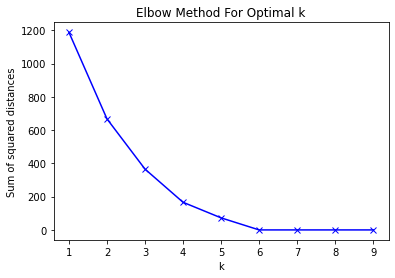

In [120]:
resorts_data = resorts.drop(['location', 'season'], axis=1)
X = resorts_data.to_numpy()
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(resorts_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [121]:
initial_medoids = kmeans_plusplus_initializer(X, 4).initialize(return_index=True)
metric = distance_metric(type_metric.MINKOWSKI, degree=2)
kmedoids_instance = kmedoids(X, initial_medoids, metric=metric)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

In [127]:
def season_mode_val(ground_truth):
    seasons = ground_truth['season'].to_list()
    mode_val = stats.mode(seasons)
    return mode_val

identified_clusters = []
counter = 0
for cluster in clusters:
    seasons = resorts.iloc[cluster, [13]]
    mode_result = season_mode_val(seasons)
    cluster_label = mode_result.mode[0]
    count = mode_result.count
    identified_clusters.append((counter, cluster_label, count))
    counter += 1

### Measuring the purity of the cluster

In [128]:
actual = 0
total = 0
for actual_count in identified_clusters:
    count = actual_count[2]
    actual += count[0]

for cluster in clusters:
    cluster_count = len(cluster)
    total += cluster_count

percent = (actual/total) * 100
purity = round(percent, 2)
print("Purity measure is", purity)

Purity measure is 100.0


### Searching datapoints in the cluster based on seasons using the cluster indexes corresponding to a particular season

In [133]:
def identify_resorts_by_season(season):
    for idx_label in identified_clusters:
        if idx_label[1] == season:
            index = idx_label[0]
            resort_indexes = clusters[index]
            return resorts.iloc[resort_indexes, :]

### Searching for Summer resorts

In [137]:
summer_resorts = identify_resorts_by_season('summer') 
summer_resorts.sample(10)

,location,air_conditioning,beach_front,outdoor_pool,animal_reserve,scenic_beauty,golfing,chair_lift,sauna,fall_colors,snowmobile_tours,skiing,aurora,season
431,Helsinki,1,0,1,0,0,0,0,0,0,0,0,1,summer
333,Seychelles,1,1,1,0,0,0,0,0,0,0,0,0,summer
410,Oslo,1,0,1,0,0,0,0,0,0,0,0,1,summer
297,Panama City,1,1,1,0,0,0,0,0,0,0,0,0,summer
422,Helsinki,1,0,1,0,0,0,0,0,0,0,0,1,summer
350,Bangkok,1,1,1,0,0,0,0,0,0,0,0,0,summer
294,Rio de Janeiro,1,1,1,0,0,0,0,0,0,0,0,0,summer
281,Java,1,1,1,0,0,0,0,0,0,0,0,0,summer
425,Reykjavik,1,0,1,0,0,0,0,0,0,0,0,1,summer
310,Java,1,1,1,0,0,0,0,0,0,0,0,0,summer


### Searching for Winter resorts

In [138]:
winter_resorts = identify_resorts_by_season('winter') 
winter_resorts.sample(10)

,location,air_conditioning,beach_front,outdoor_pool,animal_reserve,scenic_beauty,golfing,chair_lift,sauna,fall_colors,snowmobile_tours,skiing,aurora,season
41,Davos,0,0,0,0,0,0,1,1,0,1,1,0,winter
124,Mt. Buller,0,0,0,0,0,0,1,1,0,1,1,0,winter
76,St. Mortiz,0,0,0,0,0,0,1,1,0,1,1,0,winter
112,St. Mortiz,0,0,0,0,0,0,1,1,0,1,1,0,winter
91,Arkhyz,0,0,0,0,0,0,1,1,0,1,1,0,winter
98,Mt. Buller,0,0,0,0,0,0,1,1,0,1,1,0,winter
118,Arkhyz,0,0,0,0,0,0,1,1,0,1,1,0,winter
72,Alaska,0,0,0,0,0,0,1,1,0,1,1,0,winter
65,Davos,0,0,0,0,0,0,1,1,0,1,1,0,winter
35,Davos,0,0,0,0,0,0,1,1,0,1,1,0,winter


### Searching for Autumn resorts

In [139]:
spring_resorts = get_resorts('autumn') 
spring_resorts.sample(10)

,location,air_conditioning,beach_front,outdoor_pool,animal_reserve,scenic_beauty,golfing,chair_lift,sauna,fall_colors,snowmobile_tours,skiing,aurora,season
183,New Hamphshire,0,0,0,0,0,0,0,0,1,0,0,0,autumn
165,Berlin,0,0,0,0,0,0,0,0,1,0,0,0,autumn
199,Kenya,0,0,0,1,0,0,0,0,0,0,0,0,autumn
158,New Hamphshire,0,0,0,0,0,0,0,0,1,0,0,0,autumn
255,Kenya,0,0,0,1,0,0,0,0,0,0,0,0,autumn
175,Tokyo,0,0,0,0,0,0,0,0,1,0,0,0,autumn
136,Berlin,0,0,0,0,0,0,0,0,1,0,0,0,autumn
155,Tokyo,0,0,0,0,0,0,0,0,1,0,0,0,autumn
263,Zambia,0,0,0,1,0,0,0,0,0,0,0,0,autumn
167,Wyoming,0,0,0,0,0,0,0,0,1,0,0,0,autumn


### Searching for Spring resorts

In [140]:
spring_resorts = get_resorts('spring') 
spring_resorts.sample(10)

,location,air_conditioning,beach_front,outdoor_pool,animal_reserve,scenic_beauty,golfing,chair_lift,sauna,fall_colors,snowmobile_tours,skiing,aurora,season
595,Hobart,1,0,1,0,1,1,0,0,0,0,0,0,spring
497,Hobart,1,0,1,0,1,1,0,0,0,0,0,0,spring
543,Hobart,1,0,1,0,1,1,0,0,0,0,0,0,spring
544,Hobart,1,0,1,0,1,1,0,0,0,0,0,0,spring
476,Hobart,1,0,1,0,1,1,0,0,0,0,0,0,spring
493,Miami,1,0,1,0,1,1,0,0,0,0,0,0,spring
552,Lorraine,1,0,1,0,1,1,0,0,0,0,0,0,spring
535,Miami,1,0,1,0,1,1,0,0,0,0,0,0,spring
488,Miami,1,0,1,0,1,1,0,0,0,0,0,0,spring
485,Lorraine,1,0,1,0,1,1,0,0,0,0,0,0,spring
